# Brownian Motion and the Heat Equation

This notebook illustrates the equivalence between:
- Brownian motion trajectories,
- empirical marginal distributions,
- and the heat (diffusion) equation.

The examples here support Section 7 of *Mathematics of Generative AI*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.signal import fftconvolve
import os

os.makedirs('figs', exist_ok=True)
np.random.seed(0)

## 1. Simulating Brownian Motion Paths

We simulate Brownian motion using the Euler–Maruyama discretization.

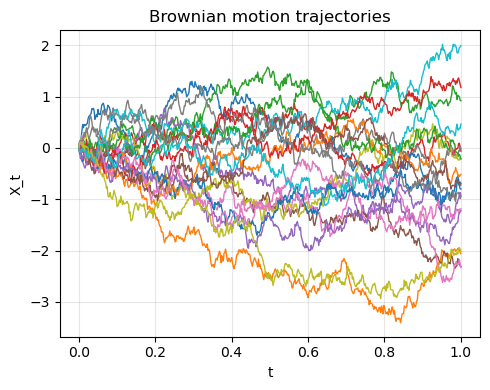

In [2]:
D = 1.0
T = 1.0
N = 500
dt = T / N
num_paths = 20

t = np.linspace(0, T, N+1)
paths = np.zeros((num_paths, N+1))

for i in range(num_paths):
    dW = np.sqrt(dt) * np.random.randn(N)
    paths[i,1:] = np.cumsum(np.sqrt(2*D) * dW)

plt.figure(figsize=(5,4))
for i in range(num_paths):
    plt.plot(t, paths[i], lw=1)
plt.xlabel('t')
plt.ylabel('X_t')
plt.title('Brownian motion trajectories')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('figs/BM_paths.png', dpi=150)
plt.show()

## 2. Empirical Marginals vs Heat Kernel

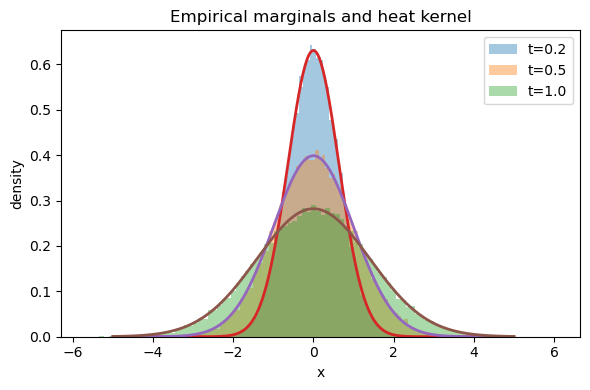

In [3]:
times = [0.2, 0.5, 1.0]
num_samples = 50000

plt.figure(figsize=(6,4))

for Tcur in times:
    X = np.sqrt(2*D*Tcur) * np.random.randn(num_samples)
    plt.hist(X, bins=100, density=True, alpha=0.4, label=f't={Tcur}')

xgrid = np.linspace(-5,5,400)
for Tcur in times:
    plt.plot(xgrid, norm.pdf(xgrid, 0, np.sqrt(2*D*Tcur)), lw=2)

plt.xlabel('x')
plt.ylabel('density')
plt.title('Empirical marginals and heat kernel')
plt.legend()
plt.tight_layout()
plt.savefig('figs/BM_heat_kernel.png', dpi=150)
plt.show()

## 3. Heat Equation via Convolution

We solve the heat equation numerically using repeated Gaussian convolution.

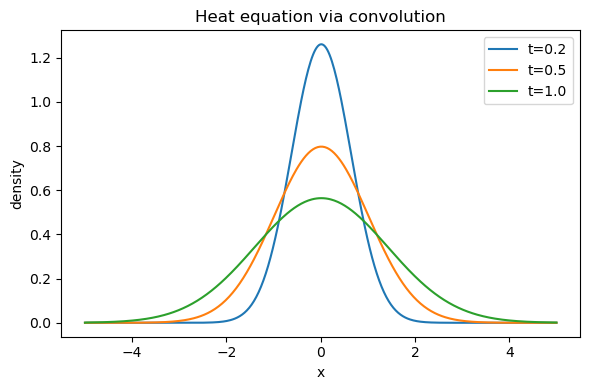

In [7]:
x = np.linspace(-5,5,400)
dx = x[1] - x[0]

p0 = np.zeros_like(x)
p0[np.abs(x) < dx] = 1/dx  # delta-like initial condition

plt.figure(figsize=(6,4))
#plt.plot(x, p0, label='t=0')

for Tcur in times:
    kernel = norm.pdf(x, 0, np.sqrt(2*D*Tcur))
    kernel /= np.sum(kernel) * dx
    pt = fftconvolve(p0, kernel, mode='same') * dx
    plt.plot(x, pt, label=f't={Tcur}')

plt.xlabel('x')
plt.ylabel('density')
plt.title('Heat equation via convolution')
plt.legend()
plt.tight_layout()
plt.savefig('figs/BM_heat_convolution.png', dpi=150)
plt.show()

## Summary

Brownian motion trajectories, empirical distributions, and PDE-based heat equation evolution all describe the same diffusion process. This equivalence underlies diffusion-based generative models.